# 1. 데이터 가져오기

In [18]:
import pandas as pd
total_data = pd.read_excel('./tech_scraping.xlsx')
total_data.head(10)

,star grade,review
0,1.5,둘다 *근에 팔았어요.\n\n와치페이스 최악\n문의답변도 성의 없고 너무 오래 걸리...
1,5.0,사용한지 꽤 지나서 평가를 남기게 되었네요~^^;;\n아마 와디즈 첫 펀딩이라 평가...
2,5.0,첫 스마트워치인데 워치페이스 커스텀편집이 안되는것 빼면 만족하고 사용중입니다.
3,2.5,다양한 기능이 있지만 정상적으로 잘동하지 않는경우가 많아요...\n그리고 워치페이스...
4,4.0,기능적으로 만족합니다. 별도로 구입한 메탈스트랩은 아쉽네요.
5,1.0,추가 밴드가 불량입니다. 펀딩 이후 곧바로 시중에서 더 저렴하게 구매가 가능했네요.
6,3.5,화면이 아쉽지만 그냥 쓸만합니다
7,2.0,싸게 잘 산 것 뿐
8,4.0,첫 스마트워치라 그런지 별 불만 없이 잘 사용하고 있어요. 복잡한 기능을 원한 것도...
9,2.5,가성비 좋을 줄 알았는데 그저 그러해서 아쉬웠네요


In [19]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15468 entries, 0 to 15467
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   star grade  15468 non-null  float64
 1   review      15468 non-null  object 
dtypes: float64(1), object(1)
memory usage: 241.8+ KB


In [20]:
len(total_data)  # null 값 없음을 알수있다.

15468

# 2. 데이터 전처리

In [21]:
x_data = total_data['review']
y_data = total_data['star grade']

## y_data 전처리
: rate의 범위를 [1,2,3,4,5]로 만들기 위해 소수점 rate 처리

In [22]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [23]:
y_data = y_data.apply(lambda val:make_y_data(val))

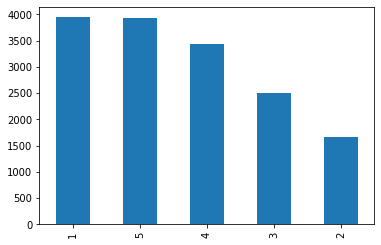

In [24]:
y_data.value_counts().plot(kind='bar')

In [25]:
y_data

0        1
1        5
2        5
3        2
4        4
        ..
15463    5
15464    5
15465    5
15466    5
15467    5
Name: star grade, Length: 15468, dtype: int64

## Split data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11601,), (11601,), (3867,), (3867,))

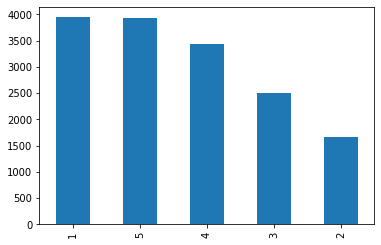

In [28]:
y_data.value_counts().plot(kind='bar')

## NPL (테스트 전처리)

In [29]:
!python -m pip install --upgrade pip

     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [30]:
!python -m pip install konlpy 

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 35.9 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [31]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  95547      0 --:--:-- --:--:-- --:--:-- 95547


In [32]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,294 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu

In [33]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

7545                                       가격대비 좋지만 기대치 이하
14415           제가 참가했던 수많은 펀딩중 유일하게 선공한건 이거 하나라고 해도 무방합니다
3114     만원짜리 쓰레기가 배송되었네요전체적 퀄리티가 진짜 중국 아무제품써도 이거보다나을듯하...
5357     일단 알람기능중에서 알람이 올때 진동의 세기를 강하게 알려주는것부터 업데이트는안되나...
324             첫 펀딩이였는데 다행이도 큰 불편없이 잘 마무리되어서 만족스럽네요 건승하시길
                               ...                        
12329                                         편해요 잘 쓰고 있어요
9768     크리메이커 오리지날을 사용하면서 품질은 익히 확인해왔고 아크릴이 아닌 메탈버젼으로 ...
14606    여러개 사려면 비용도 부담되고 보관도 어려운데 이걸 다 해결해주어 너무 좋네요 번창하세요
5999     소리도 좋고 다좋아요 집에서 영화볼땨 대만족다만 채널 변경시 초 묵음 상태이며넷플릭...
8732                                            방금 막 도착했네요
Name: review, Length: 11601, dtype: object

In [34]:
# from konlpy.tag import Mecab

In [49]:
 from konlpy.tag import Okt

In [50]:
# mecab = Mecab()
mecab = Okt()

In [51]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [52]:
import pickle

In [53]:
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [54]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['가격', '대비', '좋지만', '기', '대치', '이하'],
 ['제',
  '참가',
  '했던',
  '수많은',
  '펀딩중',
  '유일하게',
  '선공',
  '건',
  '거',
  '라고',
  '해도',
  '무방',
  '합니다'],
 ['7만원',
  '짜리',
  '쓰레기',
  '배송',
  '되었네요',
  '..',
  '\n',
  '전체',
  '퀄리티',
  '진짜',
  '중국',
  '아무',
  '제품',
  '써도',
  '거',
  '보다',
  '나을듯',
  '하네요',
  '\n',
  '무게',
  '추로',
  '2시간',
  '가량',
  '밸런스',
  '잡으려고',
  '해도',
  '조금',
  '만',
  '영향',
  '만',
  '받으면',
  '틀어지니',
  '걸',
  '어따',
  '쓰죠',
  '?',
  '\n',
  '셀카',
  '봉',
  '쓰기',
  '엔',
  '너',
  '무크',
  '고',
  '삼각',
  '대로',
  '쓰기',
  '에도',
  '부실하고',
  '그냥',
  '와디',
  '즈',
  '이제',
  '하는',
  '방향',
  '해야',
  '될듯',
  '..',
  '매번',
  '쓰레기',
  '만',
  '도착',
  '하는듯'],
 ['일단',
  '알람',
  '기능',
  '에서',
  '알람',
  '올',
  '진동',
  '세기',
  '강하게',
  '알려주는것부터',
  '업데이트',
  '안되나요',
  '.',
  '진동',
  '세기',
  '너무',
  '약합니다',
  '.'],
 ['첫',
  '펀딩',
  '였는데',
  '다행',
  '도',
  '큰',
  '불편',
  '없이',
  '마무리',
  '되어서',
  '만족스럽네요',
  '.',
  '건승',
  '하시길',
  '.'],
 ['1958616',
  '\n',
  '어제',
  '까지만',
  '해도',
  '만점',
  '가까웠음',


## Tokenizer

In [55]:
import tensorflow as tf

In [56]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [57]:
tokenizer.fit_on_texts(sentence)

In [58]:
tokenizer.word_index

{'.': 1,
 '\n': 2,
 '을': 3,
 '도': 4,
 ',': 5,
 '제품': 6,
 '사용': 7,
 '\n\n': 8,
 '..': 9,
 '로': 10,
 '...': 11,
 '너무': 12,
 '하고': 13,
 '에서': 14,
 '입니다': 15,
 '요': 16,
 '부분': 17,
 '만': 18,
 '다': 19,
 '펀딩': 20,
 '할': 21,
 '합니다': 22,
 '저': 23,
 '충전': 24,
 '?': 25,
 '못': 26,
 '보다': 27,
 '소음': 28,
 '하는': 29,
 '!': 30,
 '고': 31,
 '제': 32,
 '1': 33,
 '2': 34,
 '해서': 35,
 '인': 36,
 '했는데': 37,
 '가격': 38,
 '많이': 39,
 '거': 40,
 '정말': 41,
 '(': 42,
 '그냥': 43,
 ')': 44,
 '서': 45,
 '~': 46,
 '환불': 47,
 '같아요': 48,
 '좋은': 49,
 '3': 50,
 '조금': 51,
 '분': 52,
 '배송': 53,
 '같습니다': 54,
 '있습니다': 55,
 '처음': 56,
 '즈': 57,
 '디자인': 58,
 '와디': 59,
 '구매': 60,
 '면': 61,
 '까지': 62,
 '있는': 63,
 '바람': 64,
 '하면': 65,
 '게': 66,
 '기능': 67,
 '연결': 68,
 '해': 69,
 '-': 70,
 '에는': 71,
 '인데': 72,
 '느낌': 73,
 '이라': 74,
 '보니': 75,
 '이나': 76,
 '일단': 77,
 '만족합니다': 78,
 '키': 79,
 '배터리': 80,
 '후': 81,
 '시': 82,
 '대': 83,
 '손': 84,
 '된': 85,
 '아직': 86,
 '메이커': 87,
 '하지만': 88,
 '큰': 89,
 '이어폰': 90,
 '선풍기': 91,
 '했습니다': 92,
 '써': 93,
 '

In [59]:
tokenizer.word_counts

OrderedDict([('가격', 1405),
             ('대비', 473),
             ('좋지만', 53),
             ('기', 609),
             ('대치', 33),
             ('이하', 71),
             ('제', 1658),
             ('참가', 5),
             ('했던', 222),
             ('수많은', 29),
             ('펀딩중', 23),
             ('유일하게', 9),
             ('선공', 1),
             ('건', 534),
             ('거', 1356),
             ('라고', 371),
             ('해도', 445),
             ('무방', 10),
             ('합니다', 2121),
             ('7만원', 4),
             ('짜리', 142),
             ('쓰레기', 204),
             ('배송', 1164),
             ('되었네요', 50),
             ('..', 4350),
             ('\n', 23256),
             ('전체', 253),
             ('퀄리티', 177),
             ('진짜', 678),
             ('중국', 99),
             ('아무', 148),
             ('제품', 5849),
             ('써도', 47),
             ('보다', 1811),
             ('나을듯', 14),
             ('하네요', 484),
             ('무게', 458),
             ('추로', 1),
             

In [60]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value  # 2 미만의 수

In [61]:
total_cnt, rare_cnt, rare_cnt/total_cnt, rare_freq/total_freq

(44037, 29884, 0.6786111678815542, 0.056361343336793816)

In [62]:
vocab_size = total_cnt - rare_cnt

In [63]:
vocab_size

14153

In [64]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [65]:
tokenizer.fit_on_texts(sentence)

In [66]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '\n',
 4: '을',
 5: '도',
 6: ',',
 7: '제품',
 8: '사용',
 9: '\n\n',
 10: '..',
 11: '로',
 12: '...',
 13: '너무',
 14: '하고',
 15: '에서',
 16: '입니다',
 17: '요',
 18: '부분',
 19: '만',
 20: '다',
 21: '펀딩',
 22: '할',
 23: '합니다',
 24: '저',
 25: '충전',
 26: '?',
 27: '못',
 28: '보다',
 29: '소음',
 30: '하는',
 31: '!',
 32: '고',
 33: '제',
 34: '1',
 35: '2',
 36: '해서',
 37: '인',
 38: '했는데',
 39: '가격',
 40: '많이',
 41: '거',
 42: '정말',
 43: '(',
 44: '그냥',
 45: ')',
 46: '서',
 47: '~',
 48: '환불',
 49: '같아요',
 50: '좋은',
 51: '3',
 52: '조금',
 53: '분',
 54: '배송',
 55: '같습니다',
 56: '있습니다',
 57: '처음',
 58: '즈',
 59: '디자인',
 60: '와디',
 61: '구매',
 62: '면',
 63: '까지',
 64: '있는',
 65: '바람',
 66: '하면',
 67: '게',
 68: '기능',
 69: '연결',
 70: '해',
 71: '-',
 72: '에는',
 73: '인데',
 74: '느낌',
 75: '이라',
 76: '보니',
 77: '이나',
 78: '일단',
 79: '만족합니다',
 80: '키',
 81: '배터리',
 82: '후',
 83: '시',
 84: '대',
 85: '손',
 86: '된',
 87: '아직',
 88: '메이커',
 89: '하지만',
 90: '큰',
 91: '이어폰',
 92: '선풍기',
 93: '했습니다',


In [68]:
pickle.dump(tokenizer, open('./tokenizer_tech.pkl','wb'))

## x_train 숫자화

In [69]:
x_train = tokenizer.texts_to_sequences(sentence)

In [70]:
print(x_train[0:3])

[[39, 170, 1663, 120, 2397, 1272], [33, 8464, 431, 2673, 3140, 5859, 1, 145, 41, 242, 186, 5503, 23], [9603, 685, 475, 54, 1737, 10, 3, 370, 551, 96, 943, 659, 7, 1840, 41, 28, 4403, 167, 3, 179, 1, 2114, 2344, 2041, 7512, 186, 52, 19, 2162, 19, 3892, 1, 102, 11350, 7513, 26, 3, 826, 529, 412, 175, 1462, 6258, 32, 5504, 391, 412, 169, 5194, 44, 60, 58, 371, 30, 439, 166, 2004, 10, 1217, 475, 19, 705, 5195]]


In [71]:
hist_len = [len(words) for words in x_train]

(array([4.872e+03, 2.740e+03, 1.522e+03, 8.320e+02, 4.770e+02, 3.140e+02,
        2.110e+02, 1.440e+02, 1.020e+02, 7.300e+01, 6.100e+01, 4.000e+01,
        4.100e+01, 2.500e+01, 1.900e+01, 2.900e+01, 1.700e+01, 6.000e+00,
        1.100e+01, 7.000e+00, 9.000e+00, 5.000e+00, 4.000e+00, 5.000e+00,
        6.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([1.0000e+00, 2.5400e+01, 4.9800e+01, 7.4200e+01, 9.8600e+01,
        1.2300e+02, 1.4740e+02, 1.7180e+02, 1.9620e+02, 2.2060e+02,
        2.4500e+02, 2.6940e+02, 2.9380e+02, 3.1820e+02, 3.4260e+02,
        3.6700e+02, 3.9140e+02, 4.1580e+02, 4.4020e+02, 4.6460e+02,
        4.8900e+02, 5.1340e+02, 5.3780e+02, 5.6220e+02, 5.8660e+02,
        6.1100e+02, 6.3540e+02, 6.59

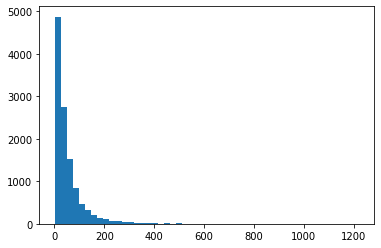

In [72]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

### padding

In [73]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)

In [74]:
x_train

array([[   0,    0,    0, ...,  120, 2397, 1272],
       [   0,    0,    0, ...,  186, 5503,   23],
       [   0,    0,    0, ...,   19,  705, 5195],
       ...,
       [   0,    0,    0, ...,    2,  991,  537],
       [   0,    0,    0, ...,  447,  732,   31],
       [   0,    0,    0, ...,  808,  705,  714]], dtype=int32)

In [75]:
import numpy as np
y_train = np.array(y_train)-1
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [76]:
len(x_train),len(y_train)

(11601, 11601)

# 3. Make model

In [81]:
model = tf.keras.models.Sequential()

In [82]:
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=200))  # input layer

# model.add(tf.keras.layers.LSTM(128))  # hidden layer
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))  # hidden layer
# model.add(tf.keras.layers.GRU(32, return_sequences=True))  # hidden layer
model.add(tf.keras.layers.GRU(128, return_sequences=True))  # hidden layer
model.add(tf.keras.layers.GRU(64))  # hidden layer

model.add(tf.keras.layers.Dense(5, activation='softmax'))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])  # gadget

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 30)           424590    
_________________________________________________________________
gru_1 (GRU)                  (None, 200, 128)          61440     
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 523,603
Trainable params: 523,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train, epochs=300, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/300
22/32 [===================>..........] - ETA: 15s - loss: 1.5814 - acc: 0.2543

# 4. Evaluation

In [ ]:
# model.evaluate(x_train, y_train)  # Bidirection epochs 100 : - loss: 1.3254 - acc: 0.8286 -> (60s)

In [ ]:
# model.evaluate(x_train, y_train)  # GRU(128) epochs 100 : - loss: 1.6015 - acc: 0.8201 -> 대신 훨씬 빠름 (32s)

In [ ]:
# model.evaluate(x_train, y_train)  # GRU(128) epochs 500 : - loss: 1.9807 - acc: 0.8355 -> (18s)

In [ ]:
# model.evaluate(x_train, y_train)  # GRU(128,64) epochs 500 : - loss: 1.7509 - acc: 0.8343 -> (46s)

In [ ]:
model.evaluate(x_train, y_train)

890/890 [==============================] - 40s 45ms/step - loss: 1.8068 - acc: 0.8494


[1.8068153858184814, 0.849420428276062]

# 5. Service

In [ ]:
model.save('./DL_tech.h5')

# 그래프로 값 비교

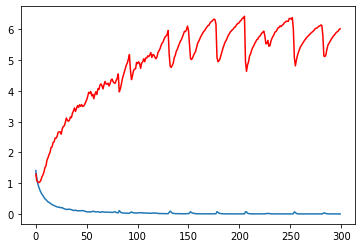

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'-r')
plt.show()

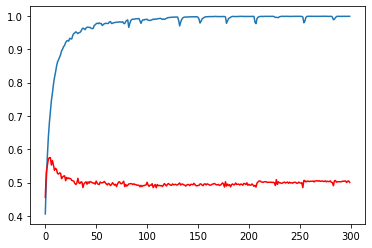

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'-r')
plt.show()